--- Dataset Head ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

--- Missing 

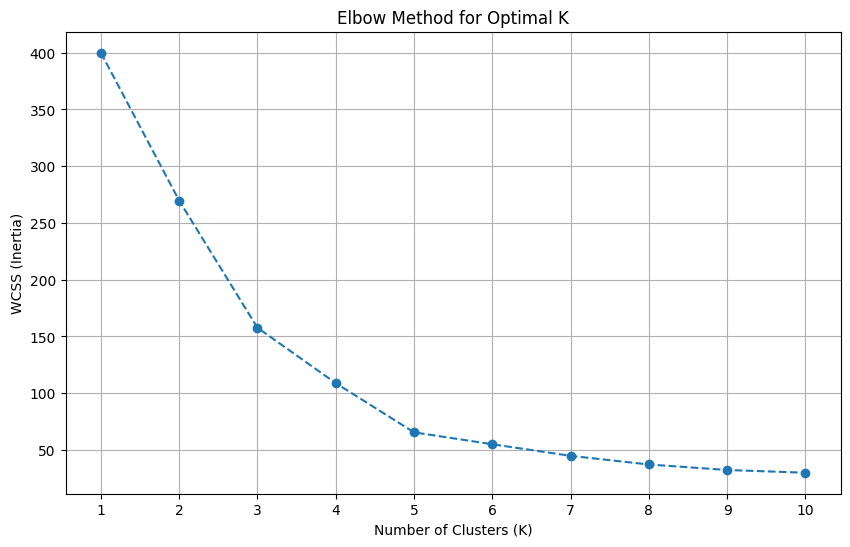

Observe the Elbow Method plot. The 'elbow' point suggests an optimal K.
Typically, for the Mall Customer dataset with these features, K=5 is chosen.

--- Performing K-Means Clustering with K=5 ---

--- Dataset with Cluster Assignments (Scaled) ---
   Annual Income (k$)  Spending Score (1-100)  Cluster
0           -1.738999               -0.434801        4
1           -1.738999                1.195704        2
2           -1.700830               -1.715913        4
3           -1.700830                1.040418        2
4           -1.662660               -0.395980        4

--- Visualizing Clusters ---


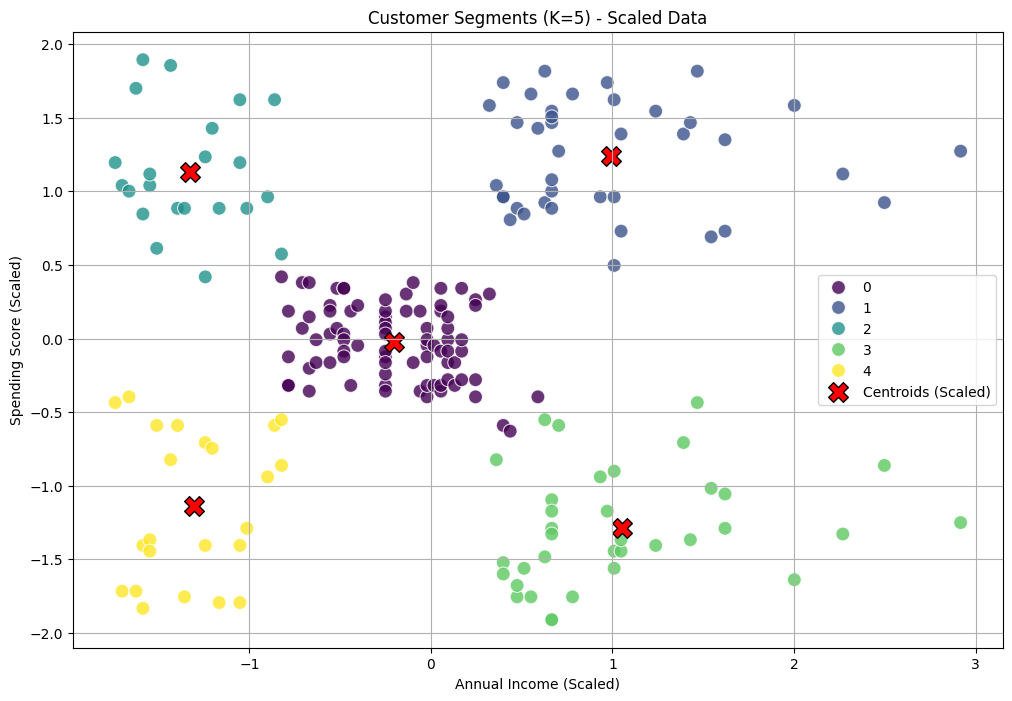


--- Evaluating Clustering with Silhouette Score ---
For K = 5, the average Silhouette Score is: 0.5547
Silhouette Score for K = 2: 0.3213
Silhouette Score for K = 3: 0.4666
Silhouette Score for K = 4: 0.4939
Silhouette Score for K = 5: 0.5547
Silhouette Score for K = 6: 0.5399
Silhouette Score for K = 7: 0.5281
Silhouette Score for K = 8: 0.4552
Silhouette Score for K = 9: 0.4571
Silhouette Score for K = 10: 0.4432


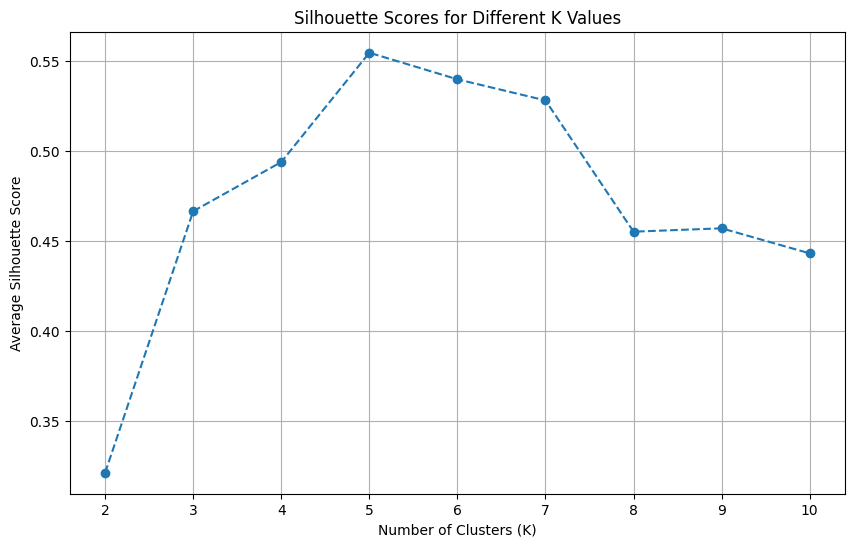


--- End of K-Means Clustering Task ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Error: 'Mall_Customers.csv' not found. Please download it and place it in the correct directory.")
    exit()

print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())


X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


print("\n--- Determining Optimal K using Elbow Method ---")
wcss = [] 
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_elbow.fit(X_scaled_df)
    wcss.append(kmeans_elbow.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(possible_k_values)
plt.grid(True)
plt.show()

print("Observe the Elbow Method plot. The 'elbow' point suggests an optimal K.")
print("Typically, for the Mall Customer dataset with these features, K=5 is chosen.")


optimal_k = 5
print(f"\n--- Performing K-Means Clustering with K={optimal_k} ---")

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled_df)


df['Cluster'] = cluster_labels
X_scaled_df['Cluster'] = cluster_labels


print("\n--- Dataset with Cluster Assignments (Scaled) ---")
print(X_scaled_df.head())


print("\n--- Visualizing Clusters ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                data=X_scaled_df, palette='viridis', s=100, alpha=0.8, legend='full')


centroids_scaled = kmeans.cluster_centers_
plt.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], marker='X', s=200,
            color='red', label='Centroids (Scaled)', edgecolors='black')

plt.title(f'Customer Segments (K={optimal_k}) - Scaled Data')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.grid(True)
plt.show()



print("\n--- Evaluating Clustering with Silhouette Score ---")
if len(np.unique(cluster_labels)) > 1: 
    silhouette_avg = silhouette_score(X_scaled_df.drop('Cluster', axis=1), cluster_labels)
    print(f"For K = {optimal_k}, the average Silhouette Score is: {silhouette_avg:.4f}")

    silhouette_scores = []
    for k_eval in range(2, 11): 
        kmeans_eval = KMeans(n_clusters=k_eval, init='k-means++', random_state=42, n_init=10)
        labels_eval = kmeans_eval.fit_predict(X_scaled_df.drop('Cluster', axis=1))
        score = silhouette_score(X_scaled_df.drop('Cluster', axis=1), labels_eval)
        silhouette_scores.append(score)
        print(f"Silhouette Score for K = {k_eval}: {score:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Scores for Different K Values')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(range(2, 11))
    plt.grid(True)
    plt.show()
else:
    print("Silhouette Score cannot be calculated for a single cluster.")

print("\n--- End of K-Means Clustering Task ---")